In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
from io import StringIO

In [11]:
file = open('../scenarios/bimodal_fine_grid/output/ITERS/it.0/0.occupancyAnalysis.txt', 'r')
data = ""
for x in file:
    if x.startswith('time'):
        match = re.search('.*\t(\d+\.\d+) veh.*(tr_\d+_\d+).*Passenger.*?(\d+)', x)
        if match:
            data += match.group(1) + ";" + match.group(2) + ";" + match.group(3) + "\n"
file.close()

occupancies = pd.read_csv(StringIO(data), names=['time', 'transporter', 'passengers'], sep=';')

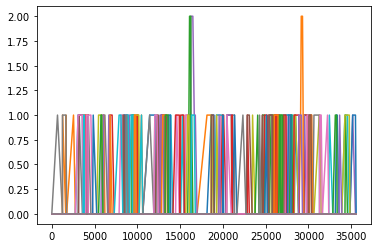

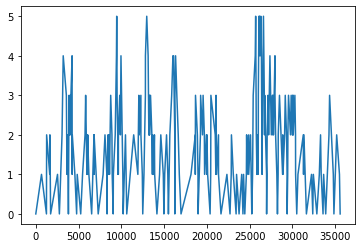

In [12]:
occupancies = occupancies.sort_values(by=['transporter', 'time'])

occupancies = occupancies.pivot(index='time', columns='transporter', values='passengers')
new_first_col = pd.DataFrame([[0] * len(occupancies.columns)], columns=occupancies.columns)
occupancies = new_first_col.append(occupancies).fillna(method='ffill')

cumulative_occupancies = occupancies.sum(axis=1)

# occupancies.to_csv('./data.csv')
occupancies.plot(legend=False)
plt.figure()
cumulative_occupancies.plot()
plt.show()